# Projeto para detecção de diabetes - SEMANTIX
### O que é a diabetes?
Diabetes é uma síndrome metabólica de origem múltipla, decorrente da falta de insulina e/ou da incapacidade da insulina exercer adequadamente seus efeitos, caracterizando altas taxa de açúcar no sangue (hiperglicemia) de forma permanente. A insulina é produzida pelo pâncreas, sendo responsável pela manutenção do metabolismo (quebra da glicose) para permitir que tenhamos energia para manter o organismo em funcionamento.

O tratamento da diabetes envolve mudanças no estilo de vida, como uma dieta saudável e a prática de exercício físico. Dependendo do caso, também podem ser necessários medicamentos, como antidiabéticos orais ou insulina.

Para prevenir o diabetes, é importante: Manter o peso adequado, Não fumar, Controlar a pressão arterial, Evitar medicamentos que possam agredir o pâncreas, Praticar atividade física regularmente.

![img](https://angioclinicabrasilia.com/wp-content/uploads/2023/09/relacao-entre-diabetes-e-doencas-vasculares.jpg)


In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
!pip install pycaret[full]

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/Erik-Henrique/Analise_Diabetes_Semantix/refs/heads/main/diabetes_prediction_dataset.csv')

### Variável resposta e variáveis explicativas

In [85]:
df.dtypes

,0
genero,object
idade,float64
hipertenso,int64
problema_coracao,int64
fumante,object
imc,float64
nivel_hemoglobinaA1c,float64
nivel_glicose_sangue,int64
diabete,int64


Temos 2 variáveis onde os dados são Strings e 7 onde os dados são Numéricos

#### Verficando valores nulos e duplicados

In [86]:
df.isna().sum()

,0
genero,0
idade,0
hipertenso,0
problema_coracao,0
fumante,0
imc,0
nivel_hemoglobinaA1c,0
nivel_glicose_sangue,0
diabete,0


Não há valores nulos no DataFrame

In [87]:
df.shape

(100000, 9)

In [88]:
df.drop_duplicates(inplace=True)

In [89]:
df.shape

(96146, 9)

Podemos notar que haviam alguns valores duplicados no DataFrame que foram eliminados

#### Distribuição das variáveis numéricas

In [90]:
df.describe()

,idade,hipertenso,problema_coracao,imc,nivel_hemoglobinaA1c,nivel_glicose_sangue,diabete
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


Percepções sobre as variáveis:

IDADE:
- O valor mínimo me parece um Outlier, já que em condições normais não há porque análisar se um recém nascido tem diabetes.
- A média é de quase  42 anos com um desvio padrão de 22, o que mostra uma grande variabilidade nos dados, condizente com as faixas de idade observadas nas análises de Quartis.

HIPERTENSO & DIABETES:
- Tem média e desvio padrão parecidos (0.7 e 0.8 / 0.26 e 0.28), o que demonstra que grande parte das pessoas da base não são hipertensos e nem possuem diabetes, o que é confirmado pela análise dos Quartis, onde pelo menos 75% das pessoas não se encaixam nesses grupos.

PROBLEMAS NO CORAÇÃO:
- Segue a mesma logica das variáveis HIPERTENSO & DIABETES, com média 0.4 e desvio padrão 0.19, mostrando que a maior parte das pessoas também não tem problemas no coração.

IMC:
- Apesar de não ser uma metrica muito confiavel de se análisar sozinha, em conjunto pode ser um bom parâmetro.
- Os valores mínimo e máximo estão muito discrepantes do que costuma ser observado, pode indicar algum tipo de erro de coleta, tendo que ser tratado.  
- A média está com um valor condizente, mesmo tendo outliers na base, os valores parecem se não afetar tando já que a média é basicamente a mesma do Quartil que representa os valores de metade da base, o desvio padrão mostra que os valores ficam dentro do normal em sua grande maioria (é esperado um valor entre 19 e 40 na maioria das vezes).
- A divisão entre Quartis também mostra que os valores estão equilibrados, mesmo tendo outliers

HEMOGLOBINA A1c:
- Média com valores condizentes aos encontrados na base, desvio padrão que mantem os valores dentro dos níveis esperados, mínimo e máximo também condizentes com os valores reais esperados (entre 4 e 14, sendo acima de 9 já preocupante assim como o 14)
- Média também parecida com a análise de Quartis.

NIVEL DE GLICOSE NO SANGUE:
- Nível médio condizente com a análise de Quartis, e proxímo aos 50% da base.
- Mínimo e máximo dentro de valores esperados, desvio padrão também, já que os valores mínimos e máximos se distanciam de forma significativa.

##### Variável resposta (Diabete)

In [91]:
df.diabete.value_counts(normalize=True)*100

,proportion
diabete,
0,91.178
1,8.822


Vemos que a variável resposta está extremamente desbalanceada, representando apenas 8.5% dos nossos dados, necessitando tratamento.

#### Distribuição das variáveis qualitativas

##### Gênero

In [92]:
df.genero.value_counts(normalize=True)*100

,proportion
genero,
Female,58.412206
Male,41.569072
Other,0.018722


In [93]:
df.genero.value_counts()

,count
genero,
Female,56161
Male,39967
Other,18


Podemos ver que a maior parte dos pacientes do DataFrame é do sexo feminino, com cerca de 58% dos dados. Porém há dados marcados como "Other", irei análisar para decidir se retiro ou não esses dados do modelo.

In [94]:
df[df['diabete']==1].genero.value_counts(normalize=True)*100

,proportion
genero,
Female,52.428672
Male,47.571328


In [95]:
df[df['diabete']==1].genero.value_counts()

,count
genero,
Female,4447
Male,4035


In [96]:
df[df['diabete']==0].genero.value_counts(normalize=True)*100

,proportion
genero,
Female,58.991148
Male,40.988319
Other,0.020533


In [97]:
df[df['diabete']==0].genero.value_counts()

,count
genero,
Female,51714
Male,35932
Other,18


Como o genero classificado como Other está apenas na classe majoritaria do DataFrame onde não há diabetes, irei retirar os dados do DataFrame.

<Axes: xlabel='genero', ylabel='Count'>

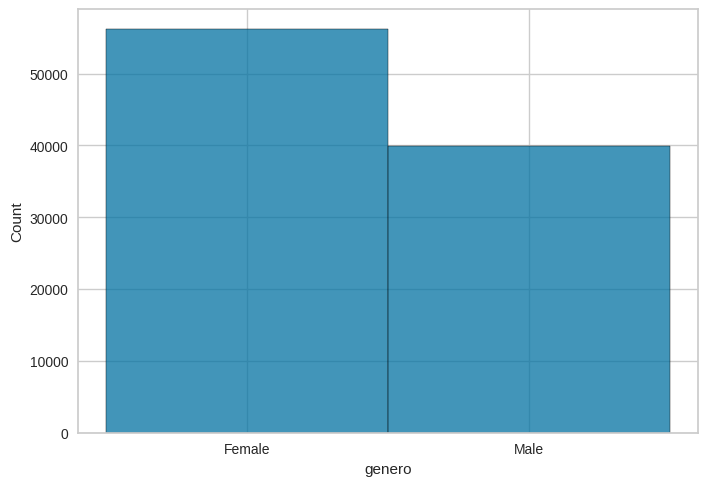

In [98]:
sns.histplot(data=df[df['genero']!="Other"], x='genero')

In [99]:
df.drop(df[df['genero']=="Other"].index, inplace=True)

In [100]:
df.genero = df.genero.map({'Female': 0, 'Male': 1})

##### Fumante

In [101]:
df.fumante.value_counts(normalize=True)*100

,proportion
fumante,
never,35.780418
No Info,34.205434
former,9.673560
current,9.567452
not current,6.615138
ever,4.157998


In [102]:
df.fumante.value_counts()

,count
fumante,
never,34395
No Info,32881
former,9299
current,9197
not current,6359
ever,3997


A variável categorica Fumante, tem muitas categorias, vou modificar os nomes agrupando de forma que faça sentido.
- Já fumou/fuma
- Nunca fumou
- Sem informações

In [103]:
# definir condições e escolhas para pop_category
conditions = [
    df['fumante'] == 'never',
    df['fumante'] == 'No Info',
    df['fumante'] == 'former',
    df['fumante'] == 'current',
    df['fumante'] == 'not current',
    df['fumante'] == 'ever'
]
choices = [
           'nunca_fumou',
           'sem_info',
           'fumou_fuma',
           'fumou_fuma',
           'fumou_fuma',
           'fumou_fuma'
           ]

# criar nova coluna "pop_category" baseada em condições e escolhas
df['fumante_cat'] = np.select(conditions, choices)

In [104]:
df.fumante_cat.value_counts()

,count
fumante_cat,
nunca_fumou,34395
sem_info,32881
fumou_fuma,28852


Com as categorias modificadas, teremos menos colunas ao criar Dummies para incluir a variável no modelo

#### Antes de realizar as análises gráficas, irei redimensionar o DataFrame, reduzindo a quantidade de dados de pessoas não diabeticas de forma aleatoria para igualar a quantidade de pessoas diabeticas.

In [105]:
under = RandomUnderSampler()
x_under, y_under = under.fit_resample(df.drop(columns='diabete'), df['diabete'])
df_under = pd.concat([x_under, y_under], axis=1)
df_under.diabete.value_counts()

,count
diabete,
0,8482
1,8482


#### Análises gráficas

In [106]:
df_under.head()

,genero,idade,hipertenso,problema_coracao,fumante,imc,nivel_hemoglobinaA1c,nivel_glicose_sangue,fumante_cat,diabete
62494,0,50.0,0,0,never,28.15,5.7,155,nunca_fumou,0
4090,1,8.0,0,0,No Info,27.32,4.8,145,sem_info,0
17652,1,59.0,1,0,former,43.95,6.6,80,fumou_fuma,0
959,1,49.0,0,0,No Info,28.60,4.5,130,sem_info,0
53522,0,51.0,0,0,ever,37.45,6.2,160,fumou_fuma,0


##### Idade

In [107]:
from scipy.stats import anderson

resultado = anderson(df_under.idade)
print(f'Estatística: {resultado.statistic}')
for i in range(len(resultado.critical_values)):
    print(f'Critério {resultado.significance_level[i]}%: {resultado.critical_values[i]}')

Estatística: 225.57847209886313
Critério 15.0%: 0.576
Critério 10.0%: 0.656
Critério 5.0%: 0.787
Critério 2.5%: 0.918
Critério 1.0%: 1.092


<Axes: xlabel='idade', ylabel='Count'>

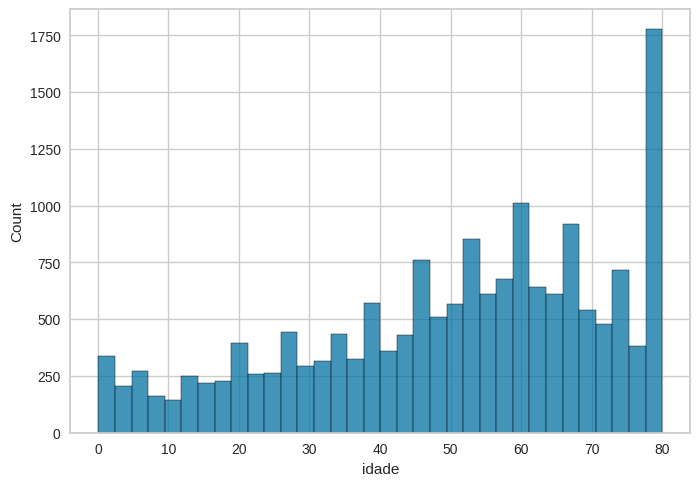

In [108]:
sns.histplot(data=df_under, x='idade')

##### imc

In [109]:
resultado = anderson(df_under.imc)
print(f'Estatística: {resultado.statistic}')
for i in range(len(resultado.critical_values)):
    print(f'Critério {resultado.significance_level[i]}%: {resultado.critical_values[i]}')

Estatística: 363.3621405119702
Critério 15.0%: 0.576
Critério 10.0%: 0.656
Critério 5.0%: 0.787
Critério 2.5%: 0.918
Critério 1.0%: 1.092


<Axes: xlabel='imc', ylabel='Count'>

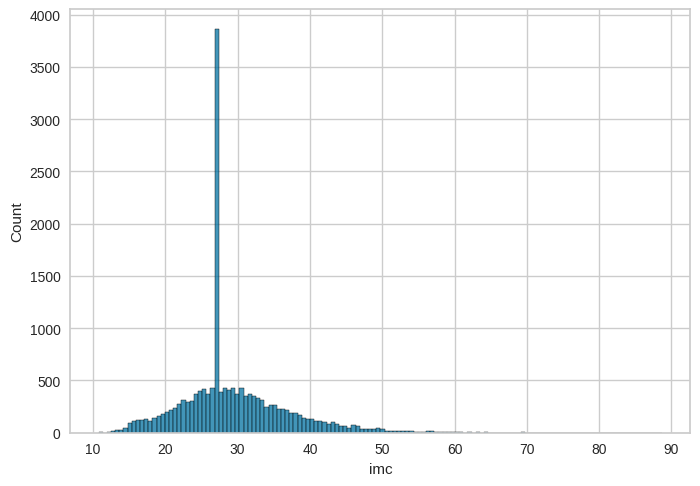

In [110]:
sns.histplot(data=df_under, x='imc')

##### Hemoglobina A1c

In [111]:
resultado = anderson(df_under.nivel_hemoglobinaA1c)
print(f'Estatística: {resultado.statistic}')
for i in range(len(resultado.critical_values)):
    print(f'Critério {resultado.significance_level[i]}%: {resultado.critical_values[i]}')

Estatística: 358.44058027137
Critério 15.0%: 0.576
Critério 10.0%: 0.656
Critério 5.0%: 0.787
Critério 2.5%: 0.918
Critério 1.0%: 1.092


<Axes: xlabel='nivel_hemoglobinaA1c', ylabel='Count'>

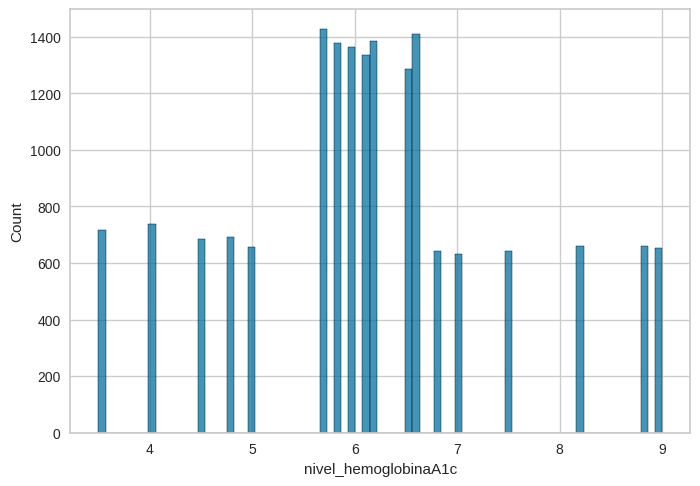

In [112]:
sns.histplot(data=df_under, x='nivel_hemoglobinaA1c')

##### Glicose no sangue

In [113]:
resultado = anderson(df_under.nivel_glicose_sangue)
print(f'Estatística: {resultado.statistic}')
for i in range(len(resultado.critical_values)):
    print(f'Critério {resultado.significance_level[i]}%: {resultado.critical_values[i]}')

Estatística: 647.4979537497602
Critério 15.0%: 0.576
Critério 10.0%: 0.656
Critério 5.0%: 0.787
Critério 2.5%: 0.918
Critério 1.0%: 1.092


<Axes: xlabel='nivel_glicose_sangue', ylabel='Count'>

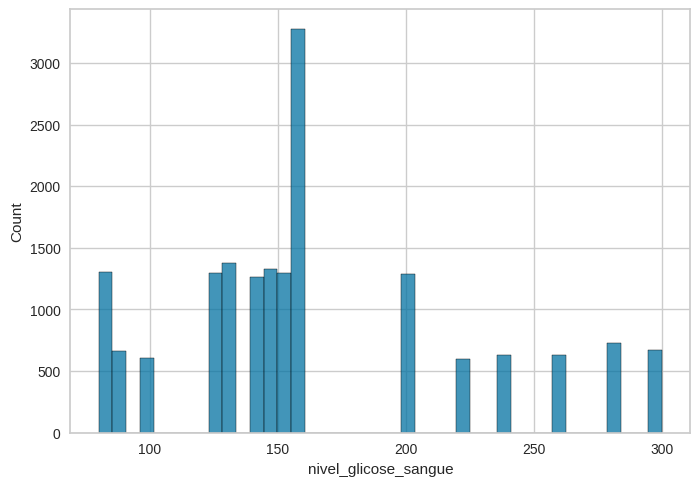

In [114]:
sns.histplot(data=df_under, x='nivel_glicose_sangue')

##### Podemos ver atravez dos testes que nenhuma das variáveis possui distribuição normal

### Testes de Associação

#### Hemoglobina A1c
A dosagem da hemoglobina glicada, também chamada de hemoglobina glicosilada, hemoglobina A1c ou simplesmente HbA1c, é um exame de sangue muito utilizado para o acompanhamento dos pacientes diabéticos, por ser ele uma forma eficaz de avaliar os níveis médios da glicose sanguínea nos últimos 2 ou 3 meses.
## Os valores de referência são:
- 4 -> Baixo
- 5 & 6 -> Excelentes
- 7 & 8 -> Atenção
- 9 ou + -> Perigo

### O que queremos testar com o teste Qi-Quadrado é se níveis de hemoglobina glicada acima de 6 é um fator que faz diferença para o desenvolvimento do Diabetes no DataFrame

In [115]:
df_under['A1c_acima_6'] = df_under['nivel_hemoglobinaA1c'].apply(lambda x: 1 if x > 6 else 0)

In [116]:
from scipy.stats import chi2_contingency

# Tabela de contingência entre A1c > 6 e Diabetes
tabela = pd.crosstab(df_under['A1c_acima_6'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre A1c > 6 e diabetes.")
else:
    print("Não há associação significativa entre A1c > 6 e diabetes.")


Estatística Qui-Quadrado: 3164.2671705745415, p-valor: 0.0
Existe associação significativa entre A1c > 6 e diabetes.


O teste confirma o que é esperado pela ciência, que um resultado para o teste de Hemoglobina A1c maior que 6 tem relação com o maior risco de desenvolvimento do diabetes

#### Nível de glicose no sangue
A medição do nível de glicose no sangue é um importante fator de determinação para entender se o paciente é considerado diabetico ou não.
## Os valores de referência são:
- Menor que 70 -> Baixo
- Entre 70 e 100 -> Excelentes
- Entre 101 e 125 -> Atenção
- Acima de 125 -> Perigo

### O que queremos testar com o teste Qi-Quadrado é se níveis de glicose no sangue superiores a 101 pode ser um fator que faz diferença para o desenvolvimento do Diabetes no DataFrame

In [117]:
df_under['glicose_acima_101'] = df_under['nivel_glicose_sangue'].apply(lambda x: 1 if x > 101 else 0)

In [118]:
from scipy.stats import chi2_contingency

# Tabela de contingência entre A1c > 6 e Diabetes
tabela = pd.crosstab(df_under['glicose_acima_101'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre Glicose > 101 e diabetes.")
else:
    print("Não há associação significativa entre Glicose > 101 e diabetes.")


Estatística Qui-Quadrado: 3039.0152643547663, p-valor: 0.0
Existe associação significativa entre Glicose > 101 e diabetes.


O teste confirma o que é esperado pela ciência, que um resultado para o teste de Glicose no sangue maior que 101 tem relação com o maior risco de desenvolvimento do diabetes

#### Hipertensão
Segundo os especialistas há uma ligação clara entre as duas doenças, onde o aparecimento de uma pode desencadear ou ser fator de risco para a outra.
## Os valores de referência são:
- 1 -> Hipertenso
- 0 -> Não hipertenso

### O que queremos testar com o teste Qi-Quadrado é se pacientes hipertensos tem este fator como uma diferença para o desenvolvimento do Diabetes no DataFrame

In [119]:
df_under['hiper'] = df_under['hipertenso'].apply(lambda x: 1 if x == 1 else 0)

In [120]:
from scipy.stats import chi2_contingency

# Tabela de contingência entre IMC > 30 e Diabetes
tabela = pd.crosstab(df_under['hiper'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre Hipertensão e diabetes.")
else:
    print("Não há associação significativa entre Hipertensão e diabetes.")


Estatística Qui-Quadrado: 1103.3686004194967, p-valor: 6.1198347802097526e-242
Existe associação significativa entre Hipertensão e diabetes.


O teste confirma o esperado, a ligação entre Hipertensão e diabetes

#### Problemas no coração
Segundo os especialistas há uma ligação clara entre as duas doenças, onde o aparecimento de uma pode desencadear ou ser fator de risco para a outra.
## Os valores de referência são:
- 1 -> Tem problemas
- 0 -> Não tem problemas

### O que queremos testar com o teste Qi-Quadrado é se pacientes com problemas no coração tem este fator como uma diferença para o desenvolvimento do Diabetes no DataFrame

In [121]:
df_under['coracao'] = df_under['problema_coracao'].apply(lambda x: 1 if x == 1 else 0)

In [122]:
from scipy.stats import chi2_contingency

# Tabela de contingência entre IMC > 30 e Diabetes
tabela = pd.crosstab(df_under['coracao'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre Problemas no coração e diabetes.")
else:
    print("Não há associação significativa entre Problemas no coração e diabetes.")


Estatística Qui-Quadrado: 802.4239925962172, p-valor: 1.6034022576248457e-176
Existe associação significativa entre Problemas no coração e diabetes.


O teste confirma o esperado, a ligação entre Problemas no coração e diabetes

#### Fumante
Segundo os especialistas há uma ligação clara entre fumar e o desenvolvimento de diabetes.
## Os valores de referência são:
- fumou/fuma -> Já fumou
- nunca_fumou -> Não fumou

### O que queremos testar com o teste Qi-Quadrado é se pacientes que fumam ou já fumaram tem este fator como uma diferença para o desenvolvimento do Diabetes no DataFrame

In [123]:
df_under['fuma'] = df_under['fumante_cat'].apply(lambda x: 1 if x == 'fumou/fuma' else 0)

In [124]:
from scipy.stats import chi2_contingency

# Tabela de contingência entre IMC > 30 e Diabetes
tabela = pd.crosstab(df_under['fuma'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre Tabagismo e diabetes.")
else:
    print("Não há associação significativa entre Tabagismo e diabetes.")


Estatística Qui-Quadrado: 0.0, p-valor: 1.0
Não há associação significativa entre Tabagismo e diabetes.


O teste confirma o esperado, a ligação entre Tabagismo e diabetes

#### IMC
Segundo os especialistas há uma ligação clara entre o aumento do peso de forma não saudavel e a diabetes, claro que o IMC não é uma metrica boa de se análisar sozinha pois o ganho de peso pode ser de forma saudavel.
## Os valores de referência são:
- Entre 18,5 & 24,9 -> IMC normal
- Entre 25 & 29,9 -> IMC pouco acima
- Maior que 30 -> IMC acima
- Maior que 35 -> IMC muito acima

### O que queremos testar com o teste Qi-Quadrado é se pacientes com peso corporal pouco acima já tem este fator como uma diferença para o desenvolvimento do Diabetes no DataFrame

In [125]:
df_under['IMC_acima_25'] = df_under['imc'].apply(lambda x: 1 if x > 25 else 0)

In [126]:
from scipy.stats import chi2_contingency

# Tabela de contingência entre IMC > 30 e Diabetes
tabela = pd.crosstab(df_under['IMC_acima_25'], df_under['diabete'])

# Teste Qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela)

print(f"Estatística Qui-Quadrado: {chi2}, p-valor: {p}")

if p < 0.05:
    print("Existe associação significativa entre IMC > 25 e diabetes.")
else:
    print("Não há associação significativa entre IMC > 25 e diabetes.")


Estatística Qui-Quadrado: 1342.9776021732005, p-valor: 5.1725169550073556e-294
Existe associação significativa entre IMC > 25 e diabetes.


O teste confirma o esperado, a ligação entre IMC acima de 30 e diabetes

### Tratando os dados para o modelo

In [127]:
df_under.head()

,genero,idade,hipertenso,problema_coracao,fumante,imc,nivel_hemoglobinaA1c,nivel_glicose_sangue,fumante_cat,diabete,A1c_acima_6,glicose_acima_101,hiper,coracao,fuma,IMC_acima_25
62494,0,50.0,0,0,never,28.15,5.7,155,nunca_fumou,0,0,1,0,0,0,1
4090,1,8.0,0,0,No Info,27.32,4.8,145,sem_info,0,0,1,0,0,0,1
17652,1,59.0,1,0,former,43.95,6.6,80,fumou_fuma,0,1,0,1,0,0,1
959,1,49.0,0,0,No Info,28.60,4.5,130,sem_info,0,0,1,0,0,0,1
53522,0,51.0,0,0,ever,37.45,6.2,160,fumou_fuma,0,1,1,0,0,0,1


In [128]:
df_under.drop(['fumante', 'A1c_acima_6', 'glicose_acima_101', 'hiper', 'hipertenso', 'coracao', 'fuma','IMC_acima_25'], axis=1,inplace=True)

In [129]:
df_modelos = pd.get_dummies(df_under, columns=['fumante_cat'])
df_modelos.fumante_cat_nunca_fumou = df_modelos.fumante_cat_nunca_fumou.astype(int)
df_modelos.fumante_cat_fumou_fuma = df_modelos.fumante_cat_fumou_fuma.astype(int)
df_modelos.fumante_cat_sem_info = df_modelos.fumante_cat_sem_info.astype(int)
df_modelos.head(1)

,genero,idade,problema_coracao,imc,nivel_hemoglobinaA1c,nivel_glicose_sangue,diabete,fumante_cat_fumou_fuma,fumante_cat_nunca_fumou,fumante_cat_sem_info
62494,0,50.0,0,28.15,5.7,155,0,0,1,0


### Criando e testando o modelo ideal com Pycaret

In [130]:
df_py = df_modelos.sample(frac=0.95, random_state=0)
df_teste = df_modelos.drop(df_py.index)
df_py.reset_index(drop=True, inplace=True)
df_teste.reset_index(drop=True, inplace=True)

In [131]:
from pycaret.classification import *

In [132]:
setup(data=df_py, target='diabete', session_id=0)

,Description,Value
0,Session id,0
1,Target,diabete
2,Target type,Binary
3,Original data shape,"(16116, 10)"
4,Transformed data shape,"(16116, 10)"
5,Transformed train set shape,"(11281, 10)"
6,Transformed test set shape,"(4835, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [133]:
best_model = compare_models(fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9102,0.9779,0.9258,0.8981,0.9116,0.8204,0.8210,1.1130
ada,Ada Boost Classifier,0.9079,0.9776,0.9189,0.8994,0.9090,0.8158,0.8161,0.3280
catboost,CatBoost Classifier,0.9050,0.9761,0.9189,0.8943,0.9064,0.8099,0.8104,7.2070
lightgbm,Light Gradient Boosting Machine,0.9047,0.9762,0.9175,0.8950,0.9060,0.8094,0.8098,0.6790
xgboost,Extreme Gradient Boosting,0.9004,0.9742,0.9097,0.8935,0.9014,0.8007,0.8011,0.2630
rf,Random Forest Classifier,0.8979,0.9717,0.9045,0.8931,0.8987,0.7958,0.7960,1.1090
et,Extra Trees Classifier,0.8945,0.9647,0.8990,0.8913,0.8951,0.7890,0.7893,0.7090
ridge,Ridge Classifier,0.8806,0.9597,0.8739,0.8861,0.8799,0.7612,0.7615,0.0420
lda,Linear Discriminant Analysis,0.8806,0.9597,0.8739,0.8861,0.8799,0.7612,0.7615,0.0470
lr,Logistic Regression,0.8804,0.9607,0.8776,0.8830,0.8802,0.7608,0.7611,1.2600


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [134]:
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [135]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9088,0.9790,0.9133,0.9053,0.9093,0.8175,0.8176
1,0.9131,0.9791,0.9274,0.9019,0.9145,0.8262,0.8266
2,0.9176,0.9813,0.9292,0.9083,0.9186,0.8351,0.8353
3,0.9016,0.9758,0.9062,0.8982,0.9022,0.8032,0.8032
4,0.9051,0.9762,0.9310,0.8855,0.9077,0.8103,0.8113
5,0.9016,0.9746,0.8867,0.9142,0.9003,0.8032,0.8036
6,0.8883,0.9744,0.8954,0.8829,0.8891,0.7766,0.7767
7,0.8963,0.9713,0.9309,0.8706,0.8997,0.7926,0.7945
8,0.8972,0.9745,0.8883,0.9043,0.8962,0.7943,0.7945


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [136]:
print(tuned_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


Como o modelo original(não tunado) obteve um resultado melhor, a saida "**print(tuned_model)**" devolveu novamente os parametros do modelo original treinado em "**print(best_model)**"

### Criando o modelo final e avaliando as metricas

In [137]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score , roc_curve , accuracy_score

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       432
           1       0.95      0.96      0.95       416

    accuracy                           0.95       848
   macro avg       0.95      0.95      0.95       848
weighted avg       0.95      0.95      0.95       848

AUC: 0.9541



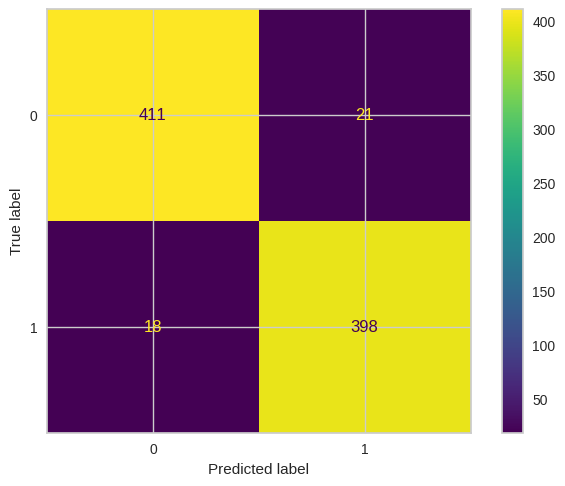

In [138]:
X_teste = df_teste.drop(columns='diabete')
y_teste = df_teste['diabete']

gbm_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbm_model.fit(X_teste, df_teste['diabete'])

ConfusionMatrixDisplay.from_estimator(gbm_model, X_teste, y_teste)
print(classification_report(y_teste, gbm_model.predict(X_teste)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, gbm_model.predict(X_teste))))

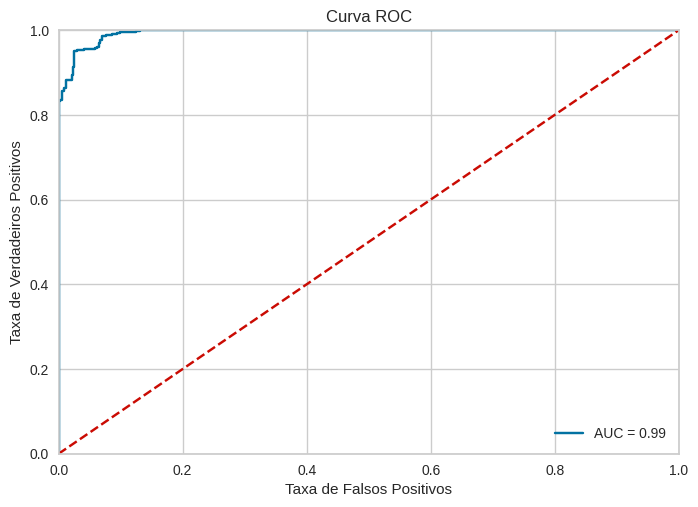

In [139]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = gbm_model.predict_proba(X_teste)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_teste, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

Percebemos que o modelo está generalizando bem os dados, tivemos um desemprenho muito bom nos dados de treino usados no Pycaret para gerar o melhor modelo inicial e tivemos ainda uma melhora com os novos dados usados para a validação do modelo. Todas as metricas de avaliação estão com valores significativos.

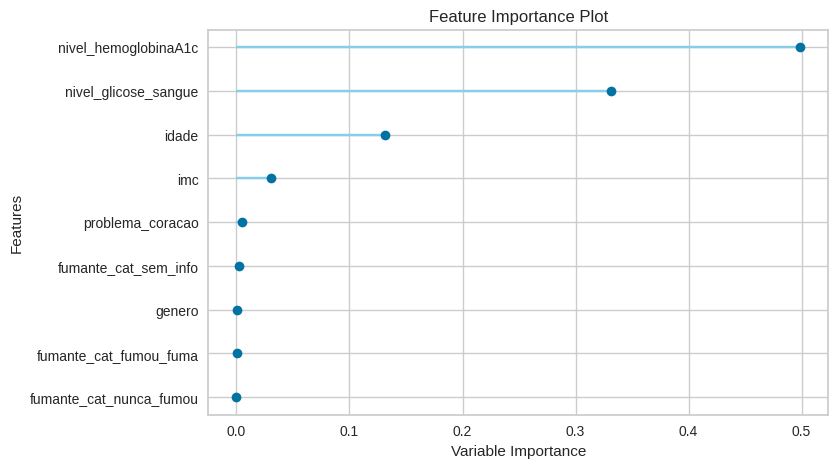

In [140]:
plot_model(best_model, plot='feature')

Avaliando a importância das variáveis, percebemos que as variáveis 'problema_coracao', 'fumante_cat_sem_info','genero','fumante_cat_fumou_fuma','fumante_cat_nunca_fumou' não tem tanto importância no modelo, vou retirar e ver se melhora a performance de algum indicador, caso não melhore manterei como está.

In [141]:
X_teste_2 = X_teste.drop(['problema_coracao', 'fumante_cat_sem_info','genero','fumante_cat_fumou_fuma','fumante_cat_nunca_fumou'], axis=1)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       432
           1       0.93      0.97      0.95       416

    accuracy                           0.95       848
   macro avg       0.95      0.95      0.95       848
weighted avg       0.95      0.95      0.95       848

AUC: 0.9461



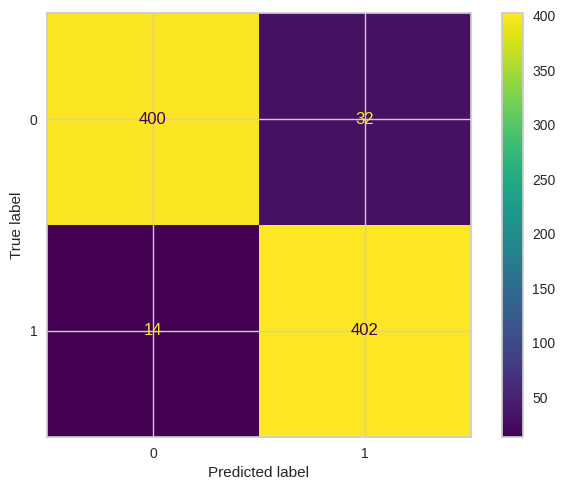

In [142]:
gbm_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
gbm_model.fit(X_teste_2, df_teste['diabete'])

ConfusionMatrixDisplay.from_estimator(gbm_model, X_teste_2, y_teste)
print(classification_report(y_teste, gbm_model.predict(X_teste_2)))
print("AUC: {:.4f}\n".format(roc_auc_score(y_teste, gbm_model.predict(X_teste_2))))

Notamos que as metricas tiveram uma leve queda, o que talves fosse previsivel já que retiramos dados do modelo, porém vemos na matriz de confusão que o modelo perdeu um pouco de Recall, o que é prejudicial para o modelo, se tratando de um modelo preditivo de saúde onde o erro na previsão pode custar a vida de algum paciente. Por isso irei manter as variáveis que aparentemente tem "menor importância"